<a href="https://colab.research.google.com/github/Neha-Seirah/ML-Activities-/blob/main/Ml_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import fpgrowth

DATA PREPROCESSING

In [4]:
#loadind and displaying the data
df=pd.read_csv('/content/Groceries_dataset (1).csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
#Understanding the data matrix
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [6]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
#convert the dataset into suitable format for association rule mining
transactions=[]
for index,row in df.iterrows():
  transactions.append(row.dropna().tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#display the transactions
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1808, '21-07-2015', 'tropical fruit'],
 [2552, '05-01-2015', 'whole milk'],
 [2300, '19-09-2015', 'pip fruit'],
 [1187, '12-12-2015', 'other vegetables'],
 [3037, '01-02-2015', 'whole milk'],
 [4941, '14-02-2015', 'rolls/buns'],
 [4501, '08-05-2015', 'other vegetables'],
 [3803, '23-12-2015', 'pot plants'],
 [2762, '20-03-2015', 'whole milk'],
 [4119, '12-02-2015', 'tropical fruit'],
 [1340, '24-02-2015', 'citrus fruit'],
 [2193, '14-04-2015', 'beef'],
 [1997, '21-07-2015', 'frankfurter'],
 [4546, '03-09-2015', 'chicken'],
 [4736, '21-07-2015', 'butter'],
 [1959, '30-03-2015', 'fruit/vegetable juice'],
 [1974, '03-05-2015', 'packaged fruit/vegetables'],
 [2421, '02-09-2015', 'chocolate'],
 [1513, '03-08-2015', 'specialty bar'],
 [1905, '07-07-2015', 'other vegetables'],
 [2810, '08-09-2015', 'butter milk'],
 [2867, '12-11-2015', 'whole milk'],
 [3962, '18-09-2015', 'tropical fruit'],
 [1088, '30-11-2015', 'tropical fruit'],
 [4976, '17-07-2015', 'bottled water'],
 [4056, '12-06-2015'

BINARY TRANSACTION MATRIX

In [9]:

df['Quantity'] = 1
transactions =  df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
def encode(x):
    if x >= 0:
        return True
    else:
        return False
basket = transactions.applymap(encode)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


FINDIND FREQUENT ITEMSET

In [10]:
item_frequencies = df['itemDescription'].value_counts()
print("Top 10 most frequent items:")
print(item_frequencies.head(10))

Top 10 most frequent items:
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GRAPH PLOTTING

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


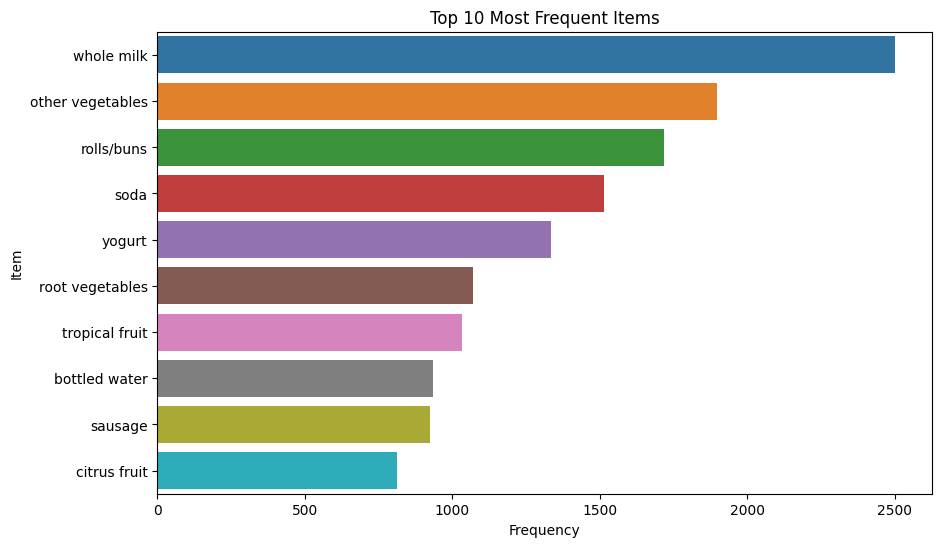

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Item frequency bar chart
plt.figure(figsize=(10, 6))
sns.countplot(y='itemDescription', data=df, order=df['itemDescription'].value_counts().index[:10])
plt.title("Top 10 Most Frequent Items")
plt.xlabel("Frequency")
plt.ylabel("Item")
plt.show()

In [12]:
min_sup=float(input("Enter minimum support:"))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter minimum support:0.2


In [13]:
#creating threading event for multithreading
import threading
apicompleted=threading.Event()
fpcompleted=threading.Event()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#setting initial execution time to zero
exetime=[0,0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FUNCTION FOR APRIORI ALGORITHM

In [15]:
def runapi():
  stime=time.time()
  apiresults=apriori(basket,min_support=min_sup,use_colnames=True)
  exetime[0]=time.time()-stime
  apicompleted.set()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FUNCTION FOR FP GROWTH

In [16]:
def runfp():
  stime=time.time()
  fpresults=fpgrowth(basket,min_support=min_sup,use_colnames=True)
  exetime[1]=time.time()-stime
  fpcompleted.set()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
#Running the threads
fp_thread = threading.Thread(target=runapi)
apriori_thread = threading.Thread(target=runfp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
apriori_thread.start()
fp_thread.start()
apicompleted.wait()
fpcompleted.wait()
apriori_thread.join()
fp_thread.join()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GRAPH PLOTTING THE EXECUTION TIME OF APRIORI AND FP GROWTH

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


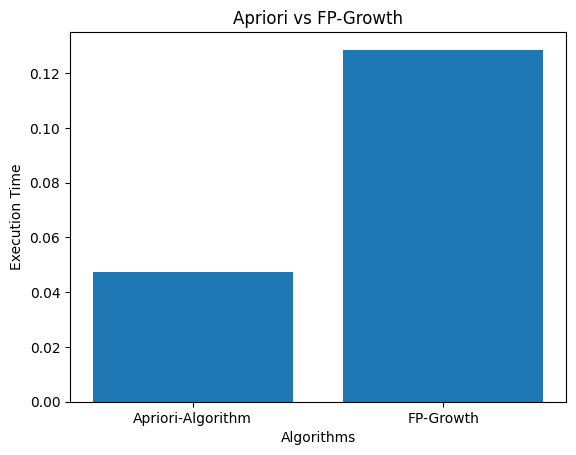

In [21]:

algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel('Algorithms')
plt.ylabel('Execution Time')
plt.title('Apriori vs FP-Growth')
plt.show()


In [22]:
if exetime[1] < exetime[0]:
    print("Recommendation: FP-growth algorithm is faster.")
else:
    print("Recommendation: Apriori algorithm is faster.")

Recommendation: Apriori algorithm is faster.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
FUNCTION TO CHECK RULES

In [23]:
def check_rules():
    confidence = input("Confidence: ")
    frequent_itemsets = fpgrowth(basket, min_support=min_sup, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=float(confidence))
    print(rules.sort_values(by = 'confidence', ascending = False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#Askining user to check association rule
choice = input('Enter YES to check for association: ')
if choice == 'YES':
    check_rules()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter YES to check for association: YES
Confidence: 0.1
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
